# data exploration

Correlations (Check top 10 positive and negative correlations)

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
corr = data.corr()['popularity'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
valence         0.009327
key             0.010675
duration_ms     0.063292
tempo           0.135047
explicit        0.214044
danceability    0.221077
loudness        0.466546
energy          0.497488
year            0.880724
popularity      1.000000
Name: popularity, dtype: float64

Top 10 - Negative Correlations:
------------------------------
acousticness       -0.593345
instrumentalness   -0.299829
speechiness        -0.135707
liveness           -0.075293
mode               -0.032854
valence             0.009327
key                 0.010675
duration_ms         0.063292
tempo               0.135047
explicit            0.214044
Name: popularity, dtype: float64


Correlation matrix

In [6]:
#previous data processing steps
data2 = data.drop(columns=['id','release_date'])
data2['NumArtists'] = pd.Series(dtype='int')
for i in range(data2.shape[0]):
    string = data2['artists'][i]
    string = string[1:len(string)-1]
    string = string.split(',')
    data2['NumArtists'][i] = int(len(string))
data2['NameLength'] = pd.Series(dtype='int')
for i in range(data2.shape[0]):
    n = len(data2['name'][i].split())
    data2['NameLength'][i] = int(n)
data = data2.drop(columns = ['name','artists'])

/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_37423/889083042.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['NumArtists'][i] = int(len(string))
/var/folders/f5/7w8rh9rx11938lxyvdr2g_940000gn/T/ipykernel_37423/889083042.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['NameLength'][i] = int(n)


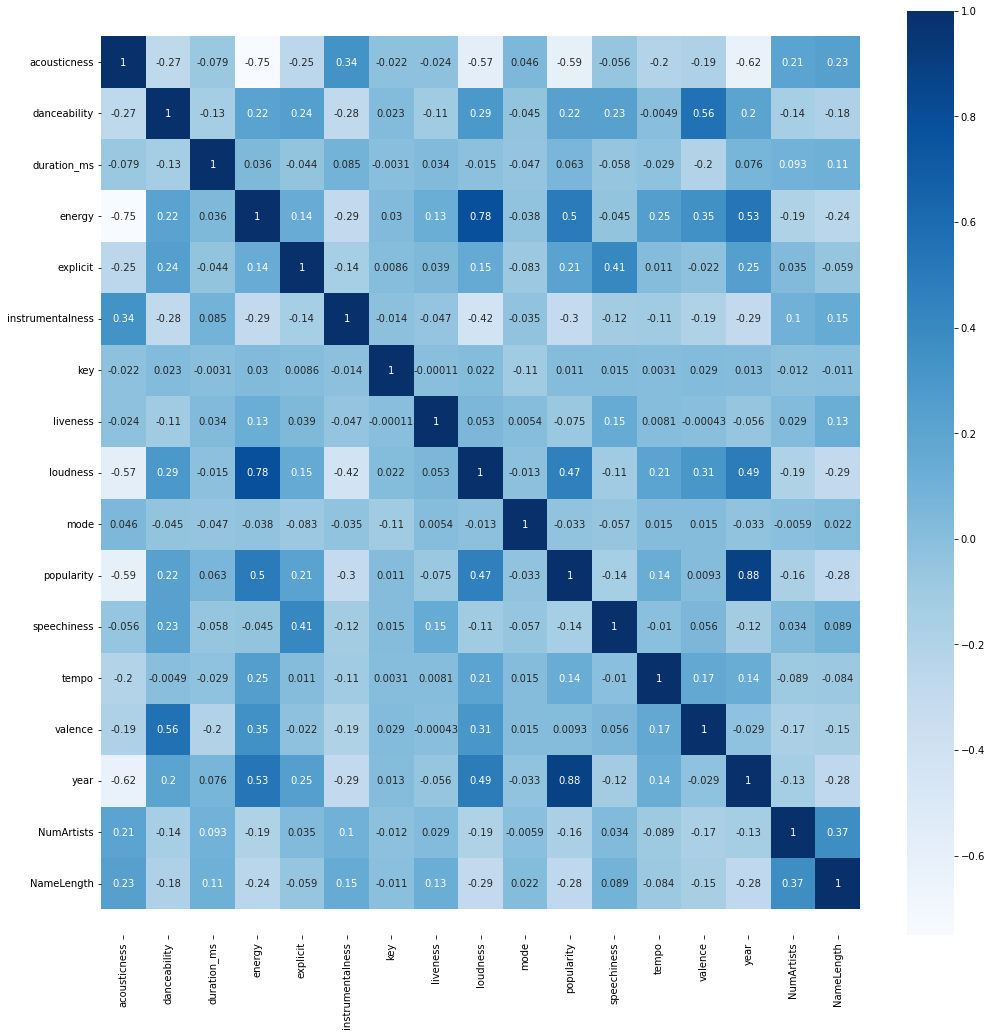

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,17))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

Distribution of discrete features

/Users/zorak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zorak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zorak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

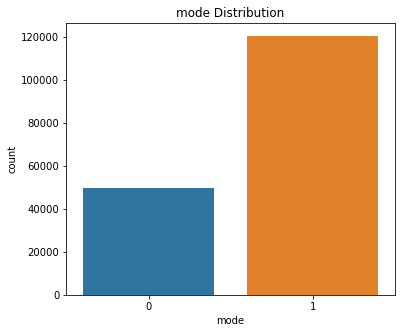

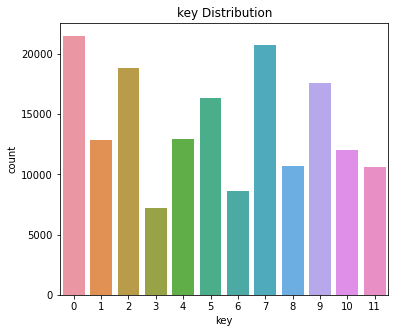

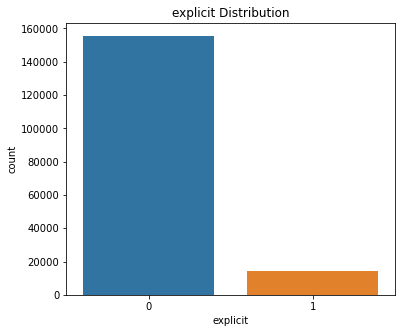

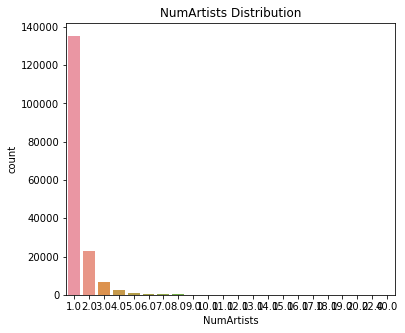

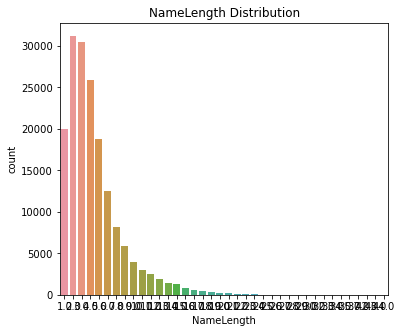

In [8]:
discrete_cols = data[['mode','key', 'explicit', 'NumArtists', 'NameLength']]
for i in discrete_cols:
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    sns.countplot(data[i])
    plt.title(i+' Distribution')


Distribution of continuous features

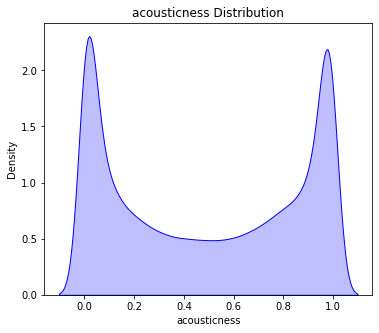

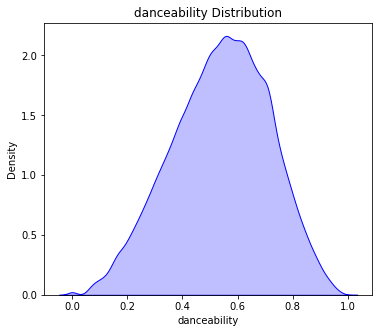

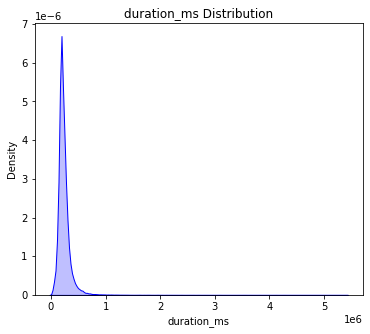

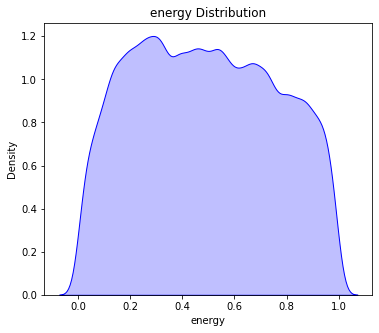

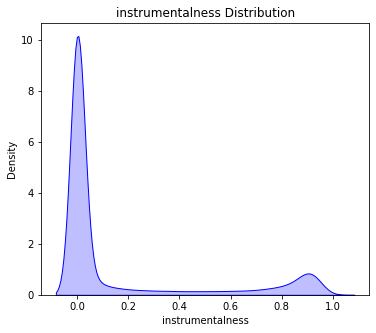

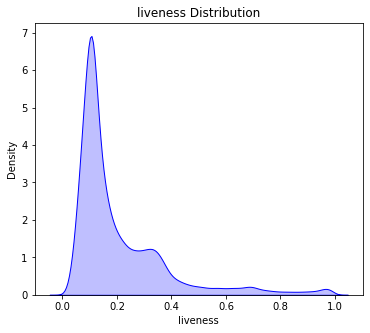

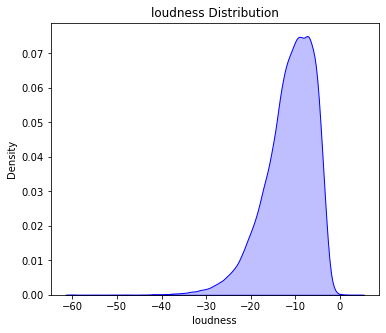

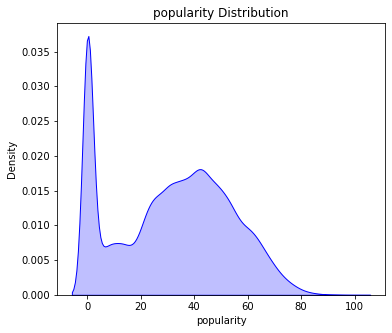

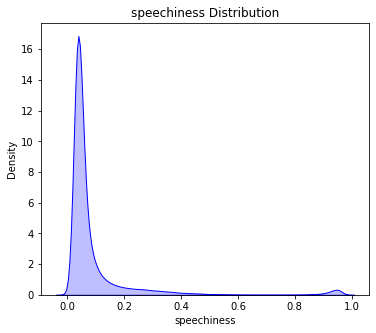

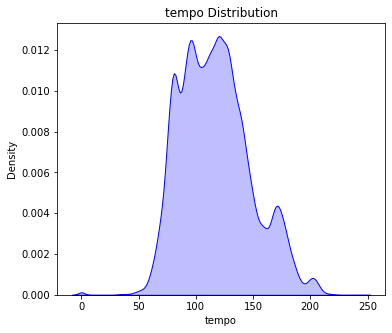

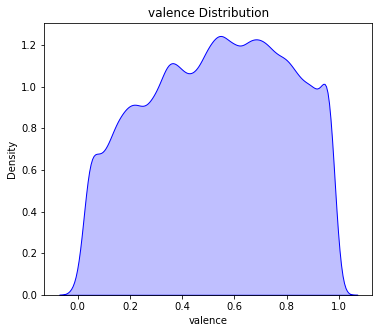

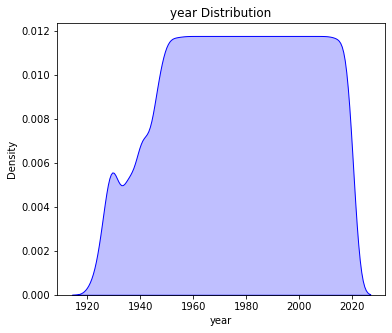

In [9]:
continuous_cols = data.drop(columns = ['mode','key', 'explicit', 'NumArtists', 'NameLength'])
for i in continuous_cols:
    plt.figure(figsize=(20,5))
    
    plt.subplot(131)
    sns.kdeplot(data[i],color='b',shade=True)
    plt.title(i+' Distribution')

Before starting to construct the models, we need to detect if there exists the heteroskedasticity problem. Otherwise the inconsistency of a variance can cause the linear regression model to have high bias.

In [10]:
data.head(5)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,NumArtists,NameLength
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928,1.0,4.0
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928,2.0,6.0
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928,1.0,5.0
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928,1.0,5.0
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928,2.0,6.0


In [11]:
x = data.drop(columns = ['popularity'])
y = data['popularity']

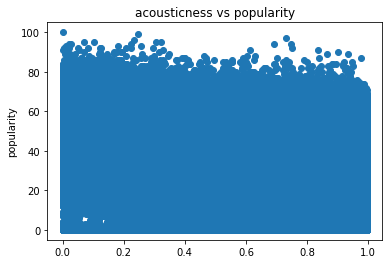

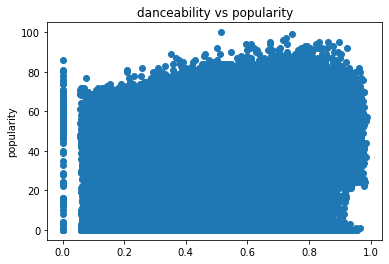

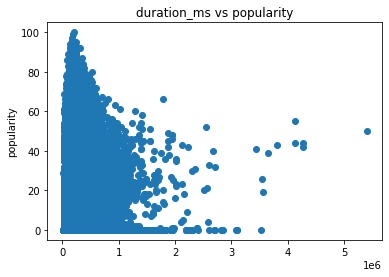

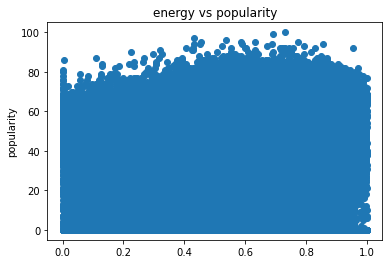

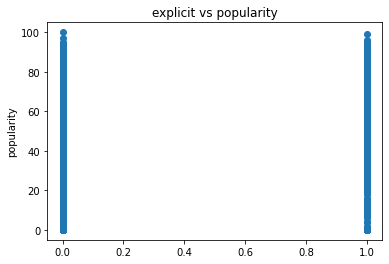

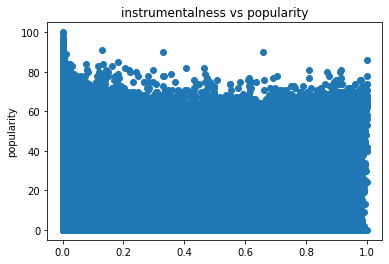

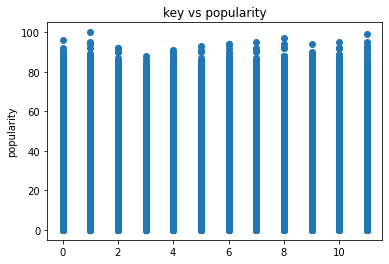

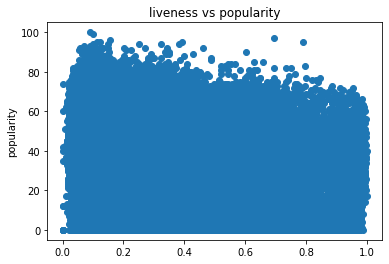

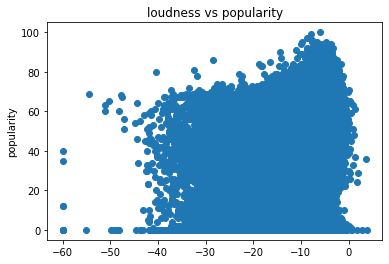

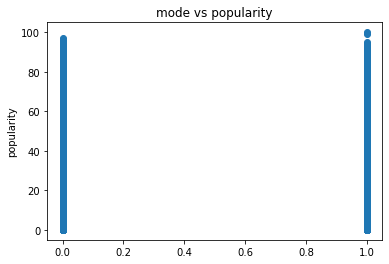

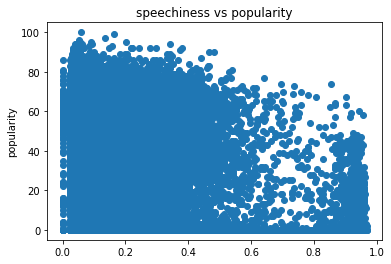

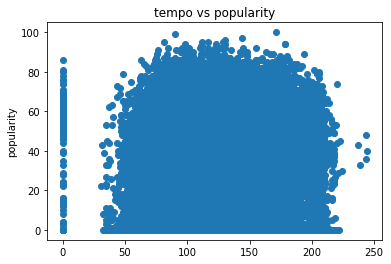

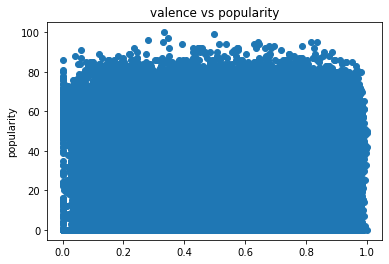

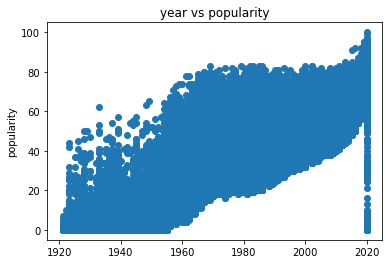

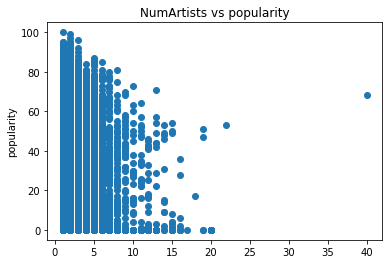

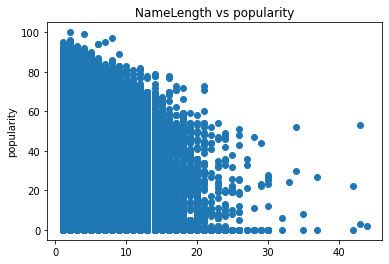

In [12]:
for i in x:
    plt.figure()
    plt.title(i + ' vs popularity')
    plt.scatter(data[i], y)
    plt.ylabel('popularity')

According to the graphs above, there is no obvious horn shape figures existing. Thus we conclude that the heteroscedasticity does not exist in our dataset.